## `This notebook create buffer around stops in gtfs file then get geopoint in gtfs-r in order to check if this point in range buffer stop or not `

In [2]:
# Import package

import pandas as pd  # data processing
import numpy as np  # linear algebra
from pandas import DataFrame
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry.polygon import Polygon
from shapely.geometry import Point, LineString
import geopandas as gpd
from shapely import wkt
pd.options.mode.chained_assignment = None  # default='warn'

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

from tqdm.notebook import tqdm


In [3]:
stops = pd.read_csv("stops.csv")

In [4]:
stops.head()

,stop_id,stop_code,stop_name,location_type,parent_station,wheelchair_boarding,platform_code,geometry
0,287144,287144.0,Wambat St At Regent St,NaN,NaN,0,NaN,POINT (148.007713610419 -33.3946508334905)
1,287145,287145.0,Oxford St At Wambat St,NaN,NaN,0,NaN,POINT (148.008122107247 -33.3927805302356)
2,287146,287146.0,Flint St At Oxford St,NaN,NaN,0,NaN,POINT (148.014977179488 -33.3923728991621)
3,287147,287147.0,Flint St At Bridge St,NaN,NaN,0,NaN,POINT (148.01487970157 -33.390461615881)
4,287140,287140.0,"Apex Riverside Tourist Park, Reymond St",NaN,NaN,0,NaN,POINT (148.018102502361 -33.4022143410961)


In [5]:
stops['geometry'] = stops['geometry'].apply(wkt.loads)
stops = gpd.GeoDataFrame(stops)

In [6]:
points = stops['geometry']
points

0        POINT (148.00771 -33.39465)
1        POINT (148.00812 -33.39278)
2        POINT (148.01498 -33.39237)
3        POINT (148.01488 -33.39046)
4        POINT (148.01810 -33.40221)
                    ...             
51079    POINT (151.16970 -33.82787)
51080    POINT (151.17421 -33.80675)
51081    POINT (151.16690 -33.83130)
51082    POINT (151.16776 -33.83263)
51083    POINT (151.16862 -33.82919)
Name: geometry, Length: 51084, dtype: geometry

In [7]:
buffer = points.buffer(3, cap_style = 3)
s= buffer.to_frame()

In [8]:
s

,0
0,"POLYGON ((151.00771 -30.39465, 151.00771 -36.3..."
1,"POLYGON ((151.00812 -30.39278, 151.00812 -36.3..."
2,"POLYGON ((151.01498 -30.39237, 151.01498 -36.3..."
3,"POLYGON ((151.01488 -30.39046, 151.01488 -36.3..."
4,"POLYGON ((151.01810 -30.40221, 151.01810 -36.4..."
...,...
51079,"POLYGON ((154.16970 -30.82787, 154.16970 -36.8..."
51080,"POLYGON ((154.17421 -30.80675, 154.17421 -36.8..."
51081,"POLYGON ((154.16690 -30.83130, 154.16690 -36.8..."
51082,"POLYGON ((154.16776 -30.83263, 154.16776 -36.8..."


In [9]:
stops_ = stops[['stop_id']]

In [10]:
stops_['geometry'] = s

In [11]:
stops_.to_csv("stops_buffer.csv", index = False)

In [18]:
def plot_bufferpoint(buffer,points):
    
    fig, ax1 = plt.subplots()
    buffer.boundary.plot(ax=ax1, color = 'slategrey')
    points.plot(ax = ax1, color = 'red')

<Figure size 1440x360 with 0 Axes>

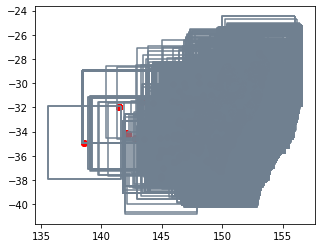

In [17]:
plot_bufferpoint(buffer,points)

In [19]:
pr_regions = pd.read_csv("stops_buffer.csv")

In [20]:
pr_regions.head()

,stop_id,geometry
0,287144,"POLYGON ((151.007713610419 -30.3946508334905, ..."
1,287145,"POLYGON ((151.008122107247 -30.3927805302356, ..."
2,287146,"POLYGON ((151.014977179488 -30.3923728991621, ..."
3,287147,"POLYGON ((151.01487970157 -30.390461615881, 15..."
4,287140,"POLYGON ((151.018102502361 -30.4022143410961, ..."


In [21]:
pr_regions['stop_id'].nunique()

51084

In [22]:
pr_regions= pr_regions.rename(columns = {"buffer" :"geometry"})

In [23]:
df = pd.read_csv("FINAL_DATA.csv")

In [24]:
df = df.head(100)

In [25]:
import geopandas as gpd

#changing to a GeoDataFrame to create geometry series
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.VP_Longitude,df.VP_Latitude))

gdf.head()

,V_ID,TripId,RouteId,Trip_StartTime,Trip_StartDate,schedule_relationship,VP_Latitude,VP_Longitude,VP_Bearing,VP_Speed,V_Timestamp,V_occupancy_status,geometry
0,43054_180769313_2459_440_1,1358332,2459_440,12:14:00,20210517,0,-33.887900,151.16745,90,0.0,1621218894,1,POINT (151.16745 -33.88790)
1,43054_180767478_2459_440_1,1252560,2459_440,11:52:00,20210517,0,-33.888294,151.16277,280,12.2,1621218894,1,POINT (151.16277 -33.88829)
2,43054_187614839_2459_440_1,1209433,2459_440,12:30:00,20210517,0,-33.877396,151.15670,265,6.0,1621218874,1,POINT (151.15670 -33.87740)
3,43054_180768965_2459_440_1,1358330,2459_440,11:44:00,20210517,0,-33.890537,151.24315,108,2.4,1621218895,1,POINT (151.24315 -33.89054)
4,43054_180768967_2459_440_1,1252564,2459_440,12:52:00,20210517,0,-33.890537,151.24315,108,2.4,1621218895,1,POINT (151.24315 -33.89054)


In [26]:
pr_regions = gpd.GeoDataFrame(gpd.GeoDataFrame(pr_regions))

#convert shapes geometry from str to lonestring using wkt.loads
pr_regions['geometry'] = pr_regions['geometry'].apply(wkt.loads)


In [27]:
pr_regions.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 51084 entries, 0 to 51083
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   stop_id   51084 non-null  object  
 1   geometry  51084 non-null  geometry
dtypes: geometry(1), object(1)
memory usage: 798.3+ KB


In [30]:
#identify those records from gdf that are intersecting with the region polygon
#this action will return a series with boolean values, if value is True it means the point 
#in that index location is within the polygon we are evaluating

pip = gdf.within(pr_regions.loc[0, 'geometry'])

#creating a new gdf keep only the intersecting records
so_pr = gdf.loc[pip].copy()

#assign region name 
so_pr['region'] = pr_regions.stop_id[0]

so_pr.head()

,V_ID,TripId,RouteId,Trip_StartTime,Trip_StartDate,schedule_relationship,VP_Latitude,VP_Longitude,VP_Bearing,VP_Speed,V_Timestamp,V_occupancy_status,geometry,region
10,38743_12741503_2435_T80_1,1304316,2435_T80,12:13:00,20210517,0,-33.922310,150.92204,99,1.2,1621218897,1,POINT (150.92204 -33.92231),287144
11,38743_12739324_2435_T80_1,1304277,2435_T80,12:10:00,20210517,0,-33.846573,150.90869,214,0.0,1621218898,1,POINT (150.90869 -33.84657),287144
13,38743_12741396_2435_T80_1,1304317,2435_T80,12:33:00,20210517,0,-33.889122,150.88316,225,0.0,1621218892,1,POINT (150.88316 -33.88912),287144
14,38743_12739376_2435_T80_1,1304276,2435_T80,12:00:00,20210517,0,-33.858940,150.89702,183,8.6,1621218894,1,POINT (150.89702 -33.85894),287144
15,38743_12739437_2435_T80_1,1050709,2435_T80,12:20:00,20210517,0,-33.926434,150.87110,12,0.0,1621218892,1,POINT (150.87110 -33.92643),287144


In [29]:
so_pr['region'].unique()

array(['287144'], dtype=object)